In [ ]:
!apt install unzip # Installing unzip command
!unzip Brain_tumor_dataset.zip -d BrainTumorDataset # !unzip fileName.zip -d distinationFolder

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Archive:  Brain_tumor_dataset.zip
  inflating: BrainTumorDataset/Y1.jpg  
  inflating: BrainTumorDataset/__MACOSX/._Y1.jpg  
  inflating: BrainTumorDataset/Y2.jpg  
  inflating: BrainTumorDataset/__MACOSX/._Y2.jpg  
  inflating: BrainTumorDataset/Y3.jpg  
  inflating: BrainTumorDataset/__MACOSX/._Y3.jpg  
  inflating: BrainTumorDataset/Y4.jpeg  
  inflating: BrainTumorDataset/__MACOSX/._Y4.jpeg  
  inflating: BrainTumorDataset/Y5.jpg  
  inflating: BrainTumorDataset/__MACOSX/._Y5.jpg  
  inflating: BrainTumorDataset/Y6.jpg  
  inflating: BrainTumorDataset/__MACOSX/._Y6.jpg  
  inflating: BrainTumorDataset/Y7.jpeg  
  inflating: BrainTumorDataset/__MACOSX/._Y7.jpeg  
  inflating: BrainTumorDataset/Y8.jpg  
  inflating: BrainTumorDataset/__MACOSX/._Y8.jpg  
  inflating: Brain

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# Reading all the images into a list
images = []
for imageFileName in os.listdir('BrainTumorDataset/'): # To read each image file in the dataset folder
  if imageFileName.endswith('.jpg') or imageFileName.endswith('.jpeg'): # Our dataset has .jpg and .jpg formats
    images.append(cv2.imread('BrainTumorDataset/Brain_tumor_dataset/' + imageFileName)) # adding all the images to the list

In [ ]:
for i in range(10):
  images[i] = images[i] # Replace each image with it's mask
images[0].shape
plt.imshow(images[0])

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
cuts = []
for i in range(10):
  widthOfQuarter = images[i].shape[0] // 2
  lengthOfQuarter = images[i].shape[1] // 2
  cuts.append(images[i][:widthOfQuarter, :lengthOfQuarter])
  cuts.append(images[i][:widthOfQuarter:, lengthOfQuarter:])
  cuts.append(images[i][widthOfQuarter:, :lengthOfQuarter])
  cuts.append(images[i][widthOfQuarter:, lengthOfQuarter:])

In [ ]:
for j in range(10):
  images[j] = cv2.resize(images[j], (256,256)) # Resize the images

In [ ]:
print(f'Number of images: {len(images)}') # Print the number of the images

Number of images: 10


(256, 256, 3)

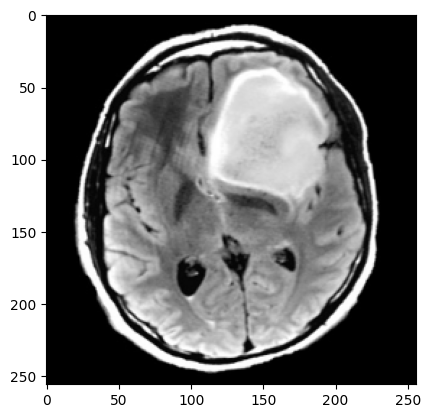

In [ ]:
plt.imshow(images[2])
images[0].shape

## Data Augmentation (Flip)

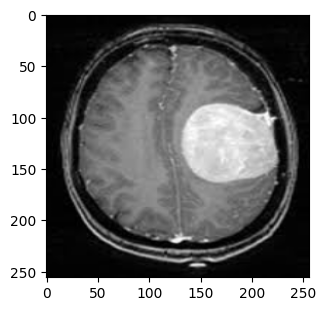

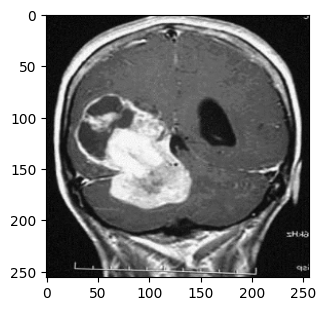

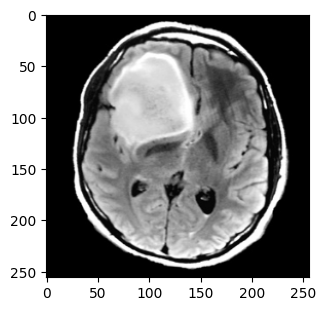

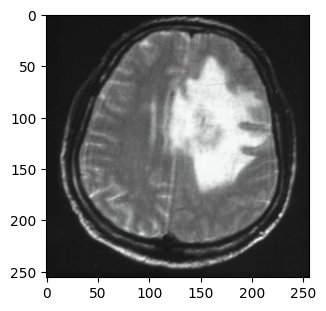

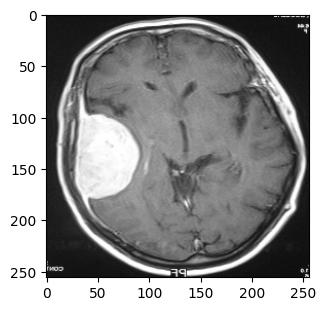

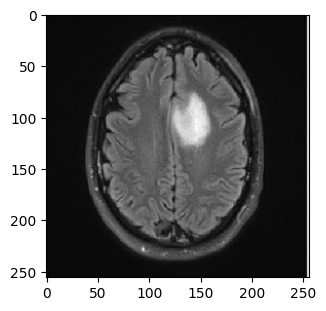

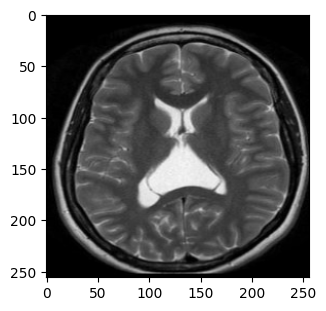

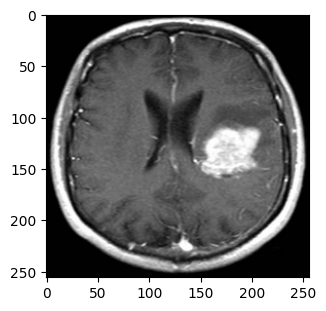

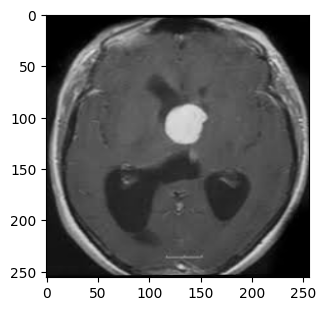

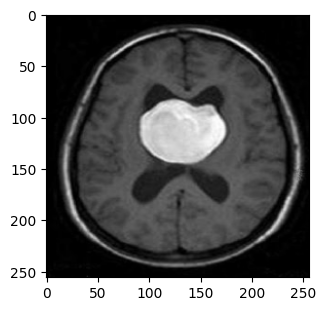

In [ ]:
k=1
fliped_list = []
for j in range(10):
  rows = []
  fliped_list=[]
  plt.figure(figsize=(40, 12))
  for r in range(images[j].shape[0]):
    for c in range(images[j].shape[1] -1 , -1 ,-1):
          rows.append(images[j][r][c])
  fliped= np.array(rows)
  fliped = fliped.reshape(256,256,3)
  fliped_list.append(fliped)
  plt.subplot(1, 10, k)
  plt.imshow(fliped)
  k +=1

# Data Augmentation (Rotate 90°)

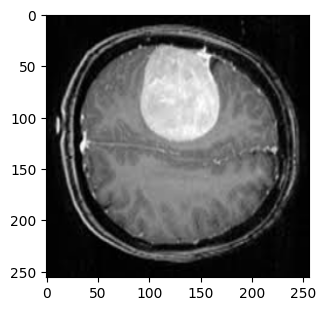

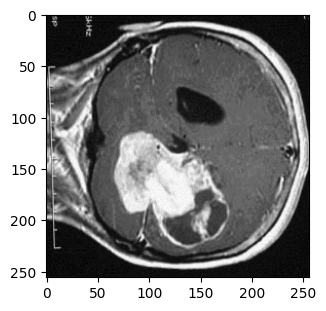

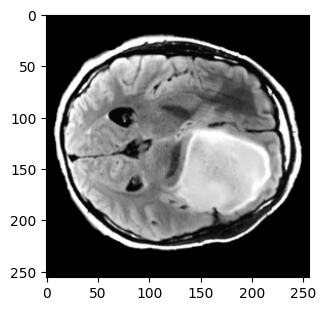

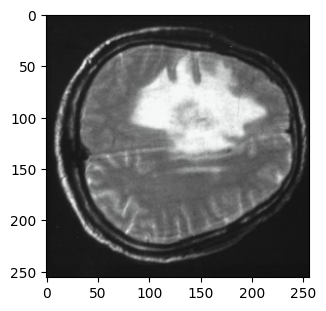

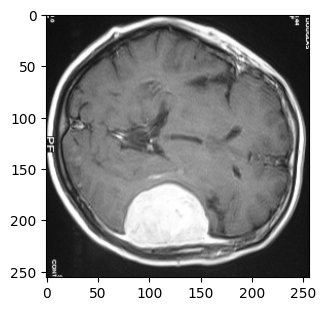

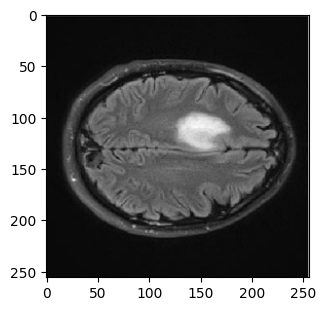

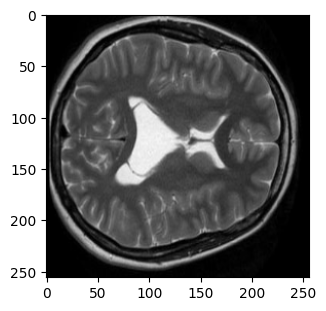

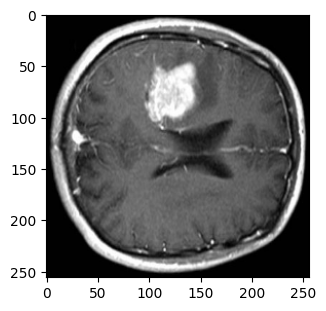

In [ ]:
k=1
rotated90_list = []
for j in range(10):
  rows = []
  plt.figure(figsize=(40, 12))
  for r in range(images[j].shape[1]):
    for c in range(images[j].shape[0]-1,-1,-1):
          rows.append(images[j][c][r])
  rotated90= np.array(rows)
  rotated90 = rotated90.reshape(256,256,3)
  rotated90_list.append(rotated90)
  plt.subplot(1, 10, k)
  plt.imshow(rotated90)
  k +=1

In [ ]:
gray_images = []
for i in range(10):
  gray=cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
  gray_images.append(gray)
  plt.imshow(gray, cmap="gray")
  plt.show()

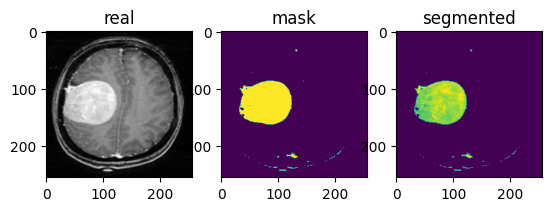

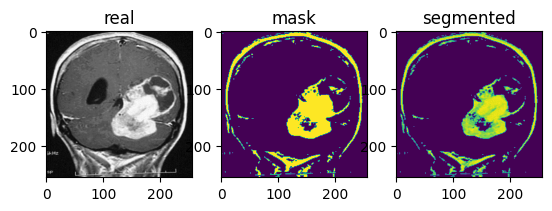

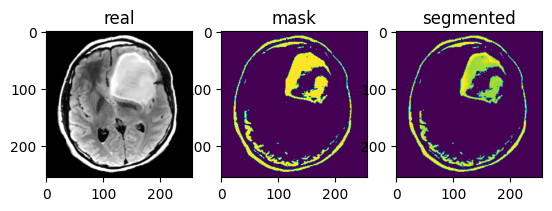

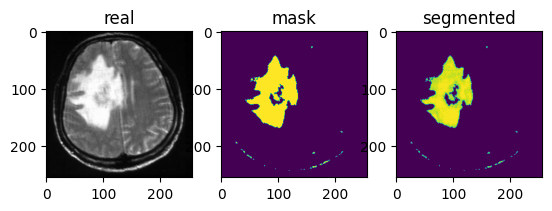

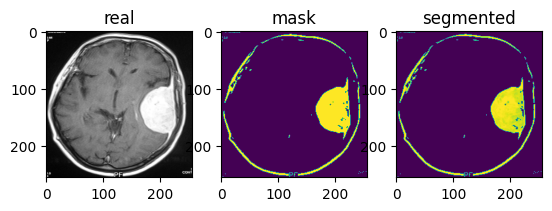

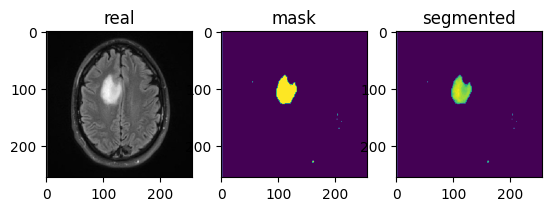

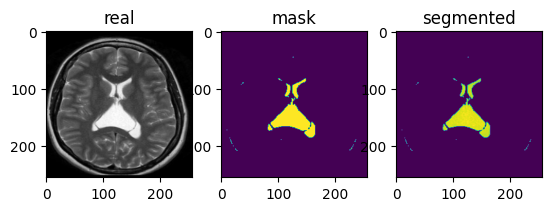

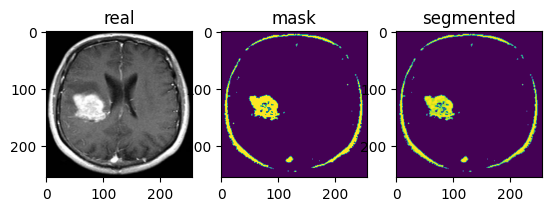

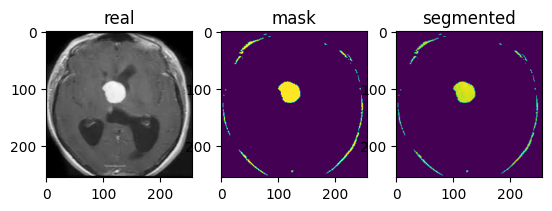

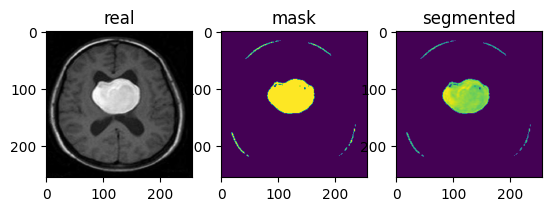

In [ ]:
list_of_lower = [175,175,210,200,220,160,190,210,180,178]
segmented_list = []
for i in range(10):
  ret , mask = cv2.threshold(gray_images[i],list_of_lower[i],255,0)
  segm = gray_images[i] * (mask/255)
  segmented_list.append(segm)
  plt.subplot(1,3,1)
  plt.imshow(gray_images[i],cmap="gray")
  plt.title('real')
  plt.subplot(1,3,2)
  plt.imshow(mask)
  plt.title('mask')
  plt.subplot(1,3,3)
  plt.imshow(segm)
  plt.title('segmented')
  plt.show()

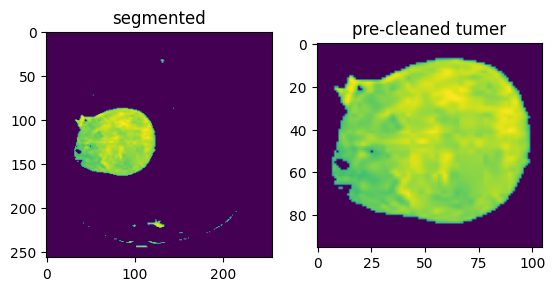

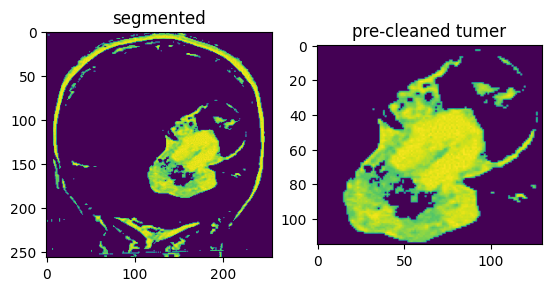

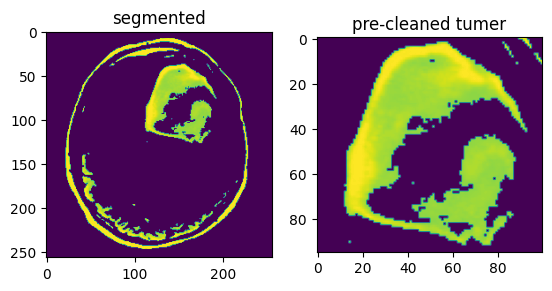

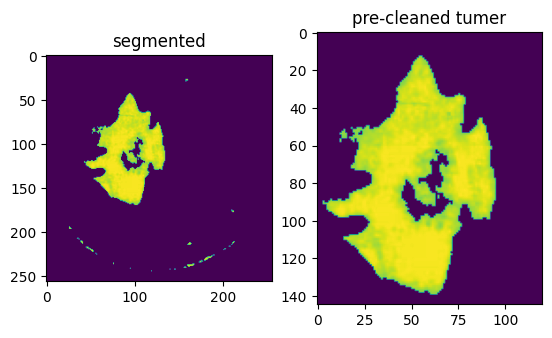

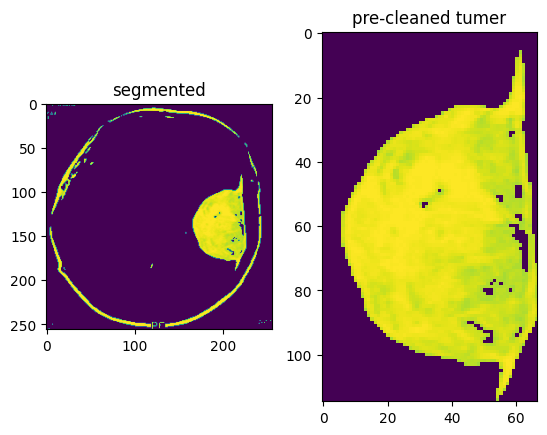

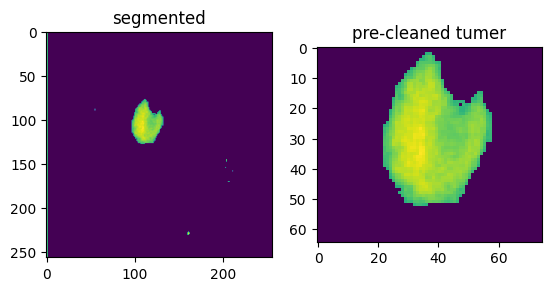

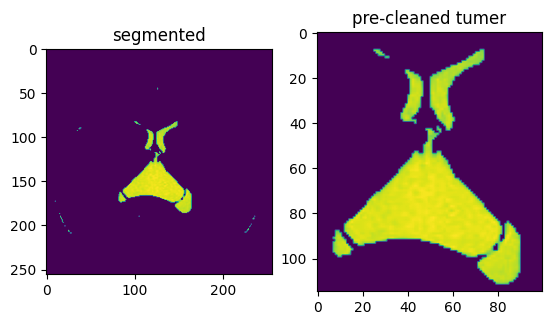

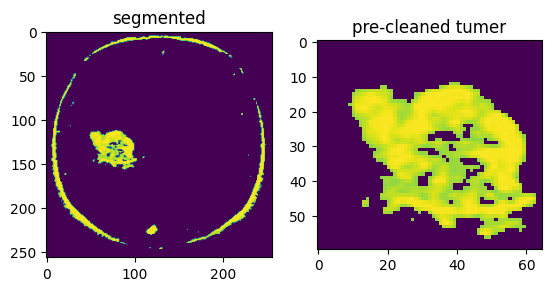

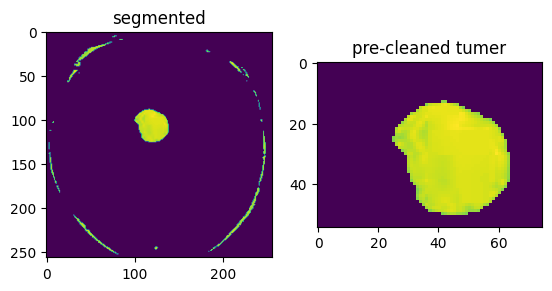

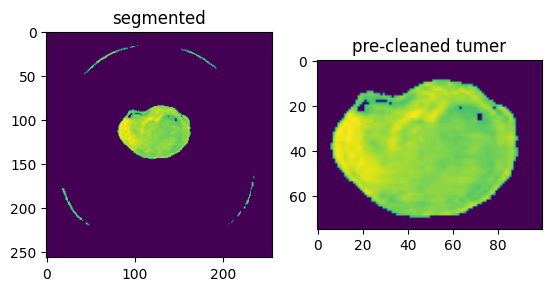

In [ ]:

  left = [25,100,100,40,160,75,75,40,75,75]
  right = [130,230,200,160,227,150,175,105,150,175]
  upper = [80,75,35,30,75,75,75,100,75,75]
  lower = [175,190,130,175,190,140,190,160,130,150]
  pre_cleaned = []
  for i in range(10):

    plt.subplot(1,2,1)
    plt.imshow(segmented_list[i])
    plt.title('segmented')
    plt.subplot(1,2,2)
    pre_cleaned.append(segmented_list[i][upper[i]:lower[i],left[i]:right[i]])
    plt.imshow(segmented_list[i][upper[i]:lower[i],left[i]:right[i]])
    plt.title('pre-cleaned tumer')


    plt.show()

In [ ]:
pre_cleaned[0].shape

(95, 105)

In [ ]:
actual_place_of_tumer = []
for z in range(10):
  for i in range(pre_cleaned[z].shape[0]-1,-1,-1):
      for j in range(pre_cleaned[z].shape[1]):
          if pre_cleaned[z][i, j] != 0:
              most_lower = i
              break
      else:
          continue
      break


  for i in range(pre_cleaned[z].shape[0]):
      for j in range(pre_cleaned[z].shape[1]):
          if pre_cleaned[z][i, j] != 0:
              most_upper = i
              break
      else:
          continue
      break


  for i in range(pre_cleaned[z].shape[1]):
      for j in range(pre_cleaned[z].shape[0]):
          if pre_cleaned[z][j, i] != 0:
              most_left = i
              break
      else:
          continue
      break


  for i in range(pre_cleaned[z].shape[1] - 1, -1, -1):
      for j in range(pre_cleaned[z].shape[0]):
          if pre_cleaned[z][j, i] != 0:
              most_right = i
              break
      else:
          continue
      break

  tumor = pre_cleaned[z][most_upper:most_lower,most_left : most_right]
  actual_place_of_tumer.append(tumor)

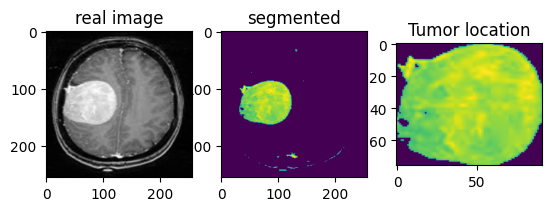

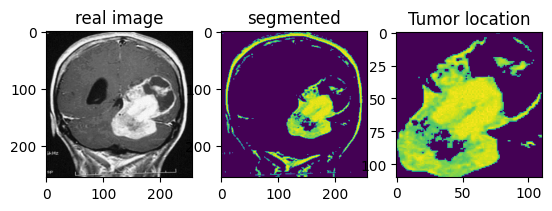

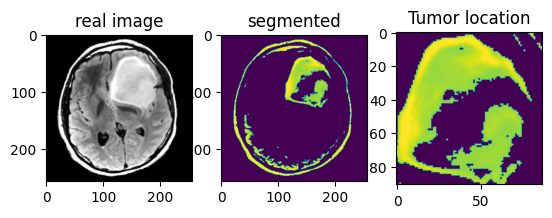

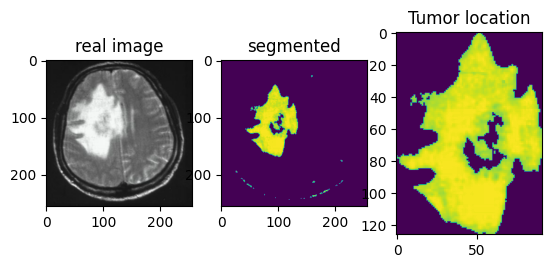

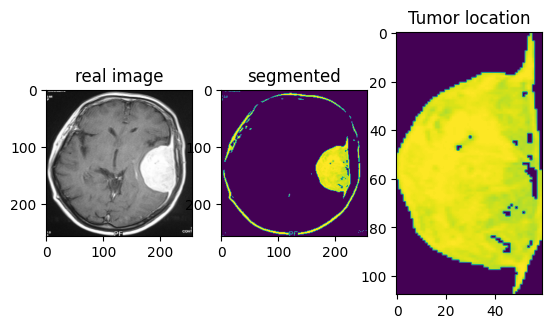

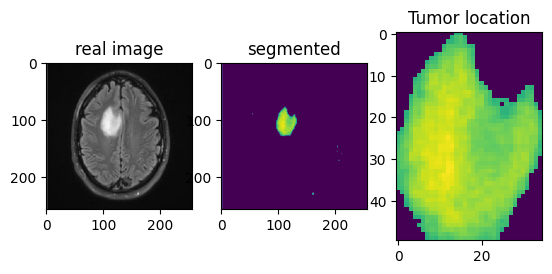

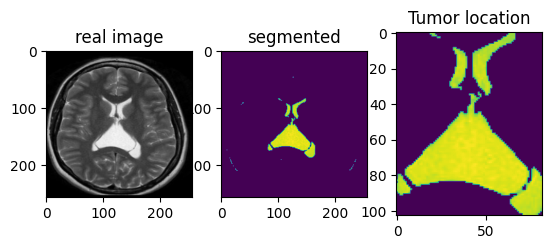

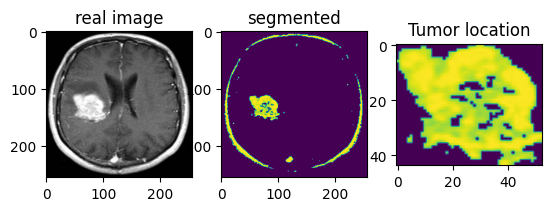

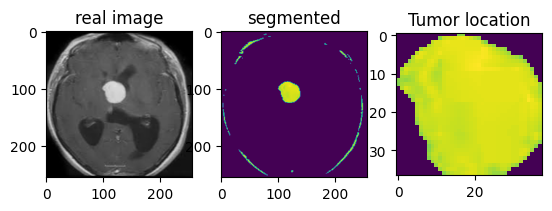

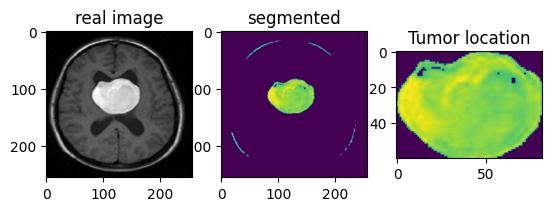

In [ ]:
for i in range(10):
    plt.subplot(1,3,1)
    plt.imshow(images[i])
    plt.title('real image')
    plt.subplot(1,3,2)
    plt.imshow(segmented_list[i])
    plt.title('segmented')
    plt.subplot(1,3,3)
    plt.imshow(actual_place_of_tumer[i])
    plt.title('Tumor location')
    plt.show()

In [ ]:
gray_images_resized = []
for j in range(10):
  gray_images_resized.append(cv2.resize(gray_images[j], (256,256)))

x = np.array(np.zeros((10,256,256)))
for i in range(x.shape[0]):
  x[i] = gray_images_resized[i]



In [ ]:
y = np.array(np.zeros((10,256,256)))
for i in range(y.shape[0]):
  y[i] = segmented_list[i]
